# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [1]:
from __future__ import print_function # require when using python 2
import os
data_path = ['.']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [6]:
import pandas as pd

# filepath = os.sep.join(data_path + ['Iris_Data.csv'])
filepath = 'Iris_Data.csv'

data = pd.read_csv(filepath)

print(data.shape)
print ('\n')
print(data.columns)
print ('\n')
print(data.dtypes)
print ('\n')

data.head()

(150, 5)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [14]:
import pandas as pd
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

data['abbrev'] = (data.species.apply(lambda x: x.replace('Iris-', '')))

print(data.iloc[:,-2:])

            species     abbrev
0       Iris-setosa     setosa
1       Iris-setosa     setosa
2       Iris-setosa     setosa
3       Iris-setosa     setosa
4       Iris-setosa     setosa
..              ...        ...
145  Iris-virginica  virginica
146  Iris-virginica  virginica
147  Iris-virginica  virginica
148  Iris-virginica  virginica
149  Iris-virginica  virginica

[150 rows x 2 columns]


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [10]:
import pandas as pd
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# count the occurrences of each species
species_counts = data['species'].value_counts()
print(species_counts)
print('\n')

# Method 2: 
group_sizes = (data.groupby('species').size())
print(group_sizes)
print('\n')

stats_df = data.describe()
# To calculate range (max - min) for each column
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%','range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'},inplace=True)
stats_df

# # Calculate mean, median, quantile, range
# print(desc)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64




,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [32]:
import pandas as pd
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# Grouping: 
group_sizes = (data.groupby('species').size())
print(group_sizes)
print('\n')

# Calculate mean
print(data.iloc[:,:4].mean())
print('\n')

# Calculate median
print(data.iloc[:,:4].median())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

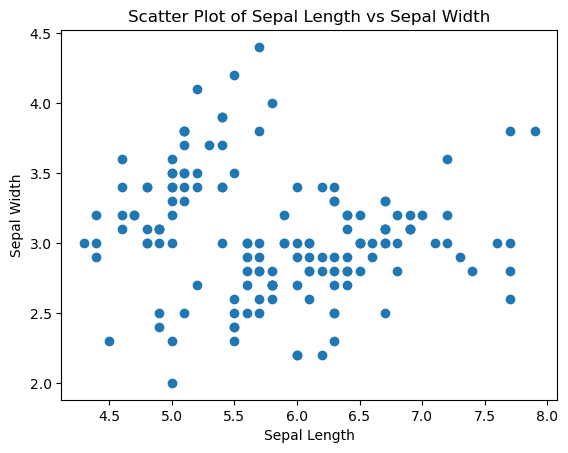

In [42]:
# ax = plt.axes()
import matplotlib.pyplot as plt

plt.plot(data.sepal_length, data.sepal_width, ls='', marker = 'o')

# Set x label, y label and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

# Display the plot 
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

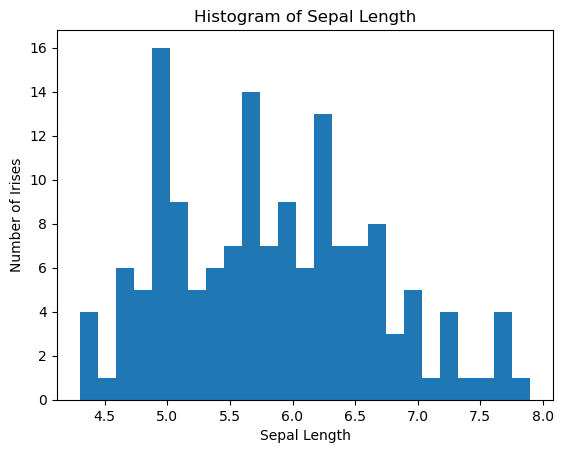

In [44]:
# ax = plt.axes()
import matplotlib.pyplot as plt

plt.hist (data.sepal_length, bins = 25)
# bins = 25 -- number of bins (intervals) into which the data wull be divided
# '25' --- the range of data will be divided into 25 equal-width bins

# Add Labels
plt.xlabel ('Sepal Length')
plt.ylabel ('Number of Irises')
plt.title ('Histogram of Sepal Length')

# Display the plot 
plt.show()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [ ]:
import seaborn as sns
sns.set_context('notebook')

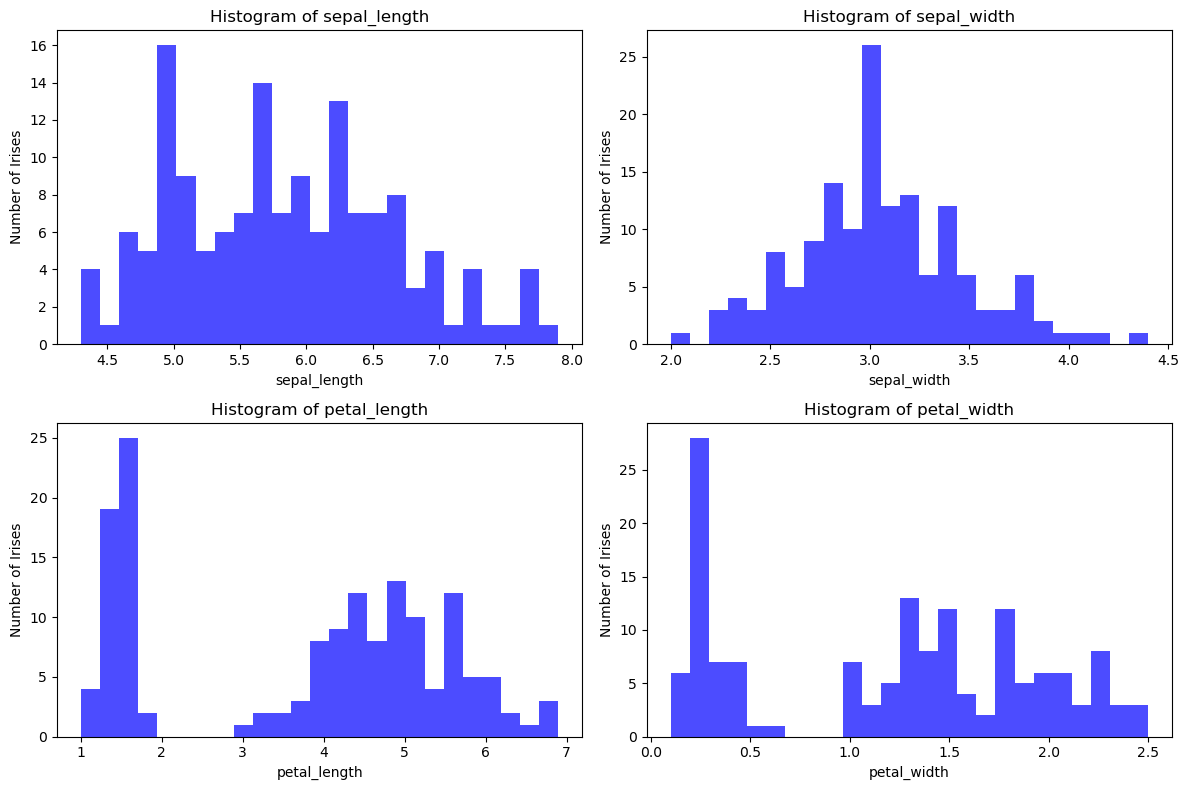

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Import  data 
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# Define the features to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
# figsize(12,8) -- 12 width, 8 height

# Flatten the axes array for easy iteration
axes = axes.ravel()
# axes.ravel() converts the 2x2 array of axes into a flat 1D array, 
# This is making it easier to handle in the subsequent loop.

# Plot histograms for each feature
for idx, feature in enumerate(features):
# Index idx = used to access the corresponding subplot in the axes array.
# Feature = used to specify which column of the DataFrame data to plot.
    axes[idx].hist(data[feature], bins=25, alpha=0.7, color='blue')
# bins = number of bins (intervals) into which the data wull be divided
# alpha = transparency level -- (1 = no transparency, 0 = invisible)
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Number of Irises')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


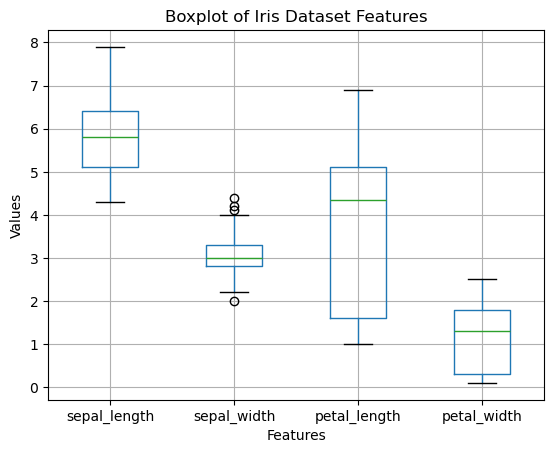

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Imported  data 
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Create a boxplot
# Here, we'll create a boxplot for each numeric feature in the dataset
data.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Set the title and labels
plt.title('Boxplot of Iris Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       species   measurement  size
0  Iris-setosa  sepal_length   5.1
1  Iris-setosa  sepal_length   4.9
2  Iris-setosa  sepal_length   4.7
3  Iris-setosa  sepal_length   4.6
4  Iris-setosa  sepal_length   5.0


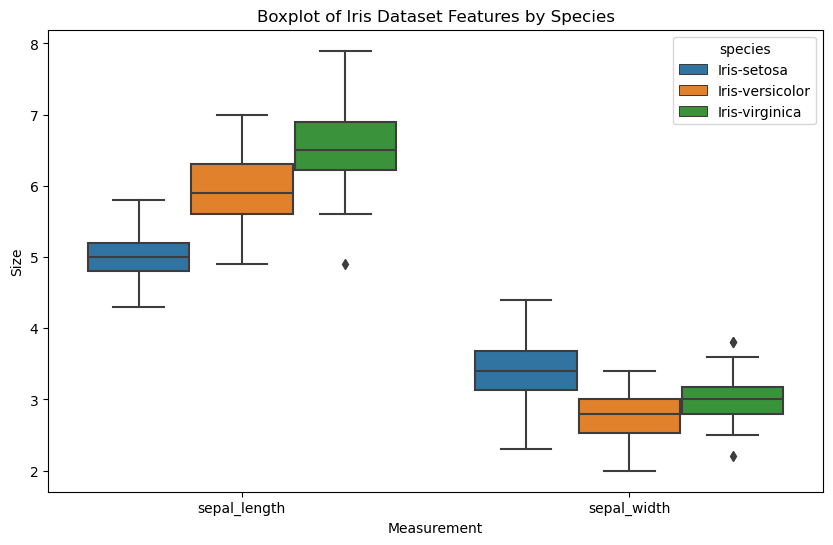

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Transform data into long format
data_melted = pd.melt(data, id_vars=['species'], value_vars=['sepal_length', 'sepal_width'],
                      var_name='measurement', value_name='size')

# Display the transformed dataframe
print(data_melted.head())

# Create a Seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='measurement', y='size', hue='species', data=data_melted)

# Set the title and labels
plt.title('Boxplot of Iris Dataset Features by Species')
plt.xlabel('Measurement')
plt.ylabel('Size')

# Show the plot
plt.show()

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

D:\Software\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\s

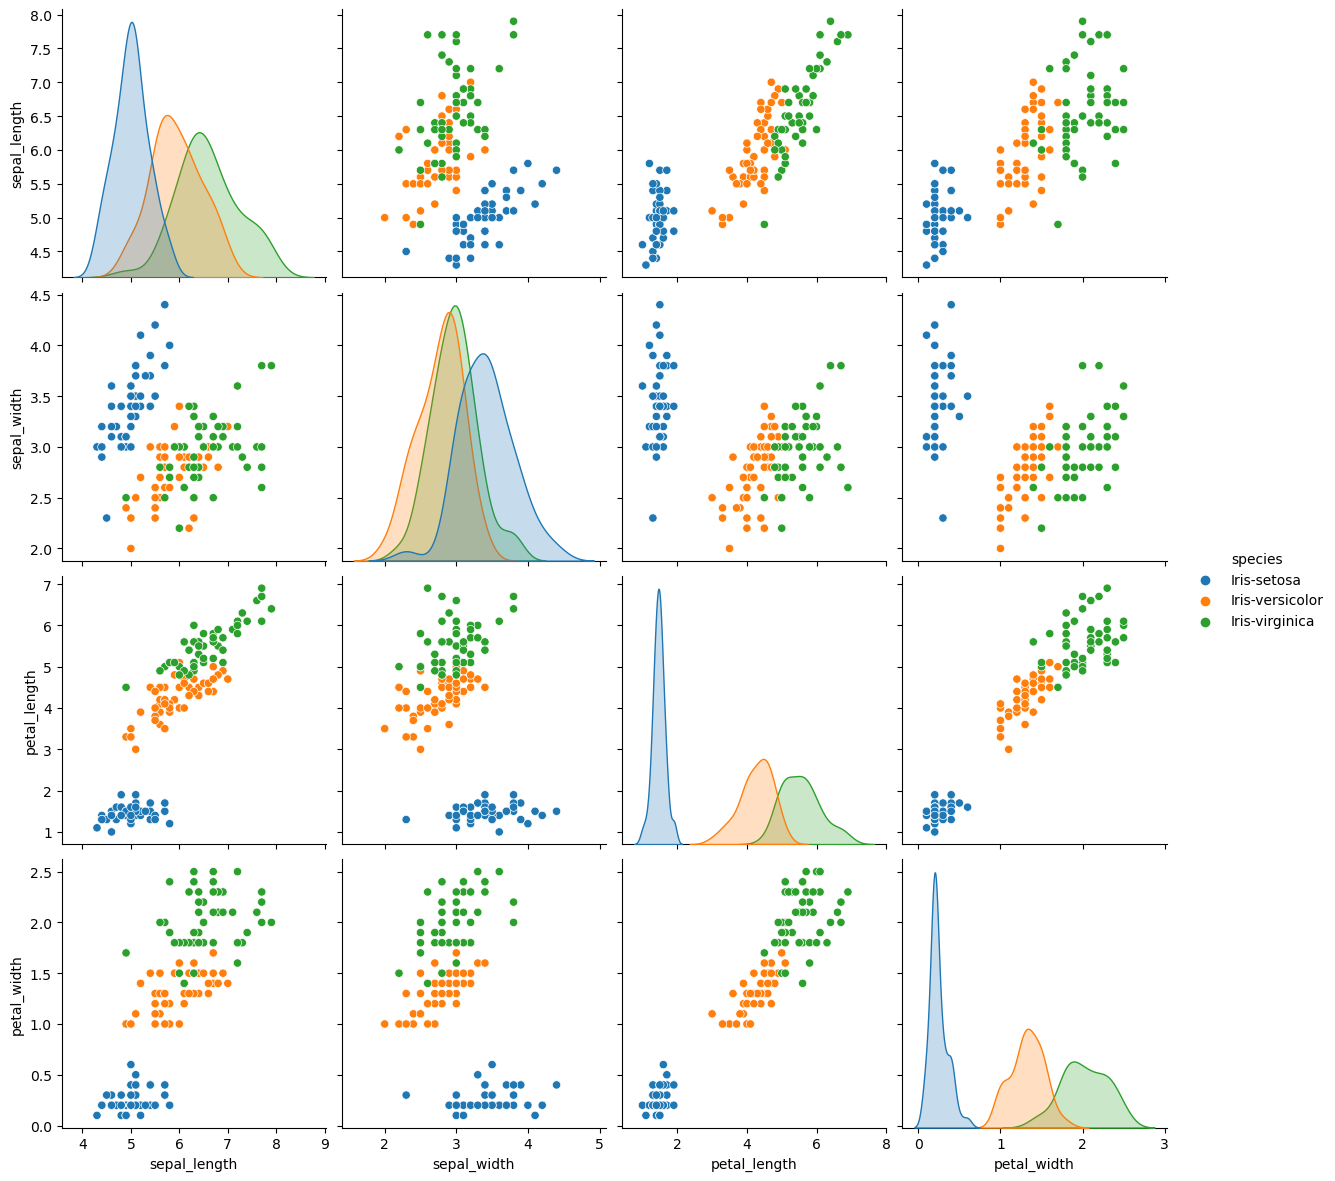

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath)

# Create a Seaborn pairplot
sns.pairplot(data, hue='species', size = 3)
# hue = specifies a column in the DataFrame (defines the color of the points in the plots)
# so, each species of Iris will have a different colour

# size = specify the height of each plot in the grid
# size = 3 -- 3 inches tall

# Show the plot
plt.show()